# EV - Mathematical Modelling

<br>
<br>
<br>
<br>


## Background

<font size="3">
Electric vehicles commonly employ a single speed gearbox due to the electric motor's extensive power band and exceptional dynamic capabilities. 
<br>
<br>However, incorporating a multi-speed gearbox that is efficient, smooth-shifting, and cost-effective could enhance the balance between the economic and dynamic performance of electric vehicles.

The multi-speed gearbox can not only improve the overall drivability and motor efficiency, but also downsize the battery and motor.
</font>
<br>
<br>

## Objective

<font size="3">

* The main objective of this study is to create a mathematical model that describes the performance of a electric vehicle equipped with a two-speed gearbox.

* After modelling and designing the electric vehicle ,The full-scale working model will be developed and tested.
</font>
<br>
<br>

## About Two-speed gearbox.
<font size="3">
The two-speed gearbox helps to extract a better dynamic performance from the electric vehicle.

The first gear comes into play at lower velocity, helping the vehicle to launch quicker and maneuver steep slopes. whereas when the speed is gradually increased, shifting to the next gear helps the vehicle to perform better at higher velocities.
</font>
<br>
<br>

# Steps Taken
<font size="3">

* <strong>Driving Cycle Analysis</strong> - To understand the realistic driving patterns of a electric wheelchair.

* <strong>Electric Motor's Power Curve Analysis</strong> - To identify maximum continuos torque and critical point.

* <strong>Mathematical modelling</strong> - Mathematical modelling refers to the process of putting together the mathematical equations for performing accurate and useful simulations.<br><br>The performance of an electric vehicle can be mathematically modelled with the use of computer program.<br><br>Computer based methods allow us to quickly experiment with aspects of the vehicle, such as motor power, Gear ratio, weight and so on, and see how the changes affect the performance.<br><br>When we refer to vehicle's performance , we are specifically talking about the acceleration and maximum speed that can be attained by the vehicle.

* <strong>Designing and Manufacturing</strong> - Electric vehicle will be designed using SOLIDWORKS® .

* <strong>Conclusion</strong> - The results of fully functional model and mathematical model will be compared to identify correlations.
</font>

# Driving Cycle Analysis

<font size = '3'>No vehicle is really driven at constant velocity, especially not on level ground, and in still air.

Therefore, The driving cycles are intended to correspond to realistic driving patterns in different conditions. These driving cycles (or schedules) have primarily been developed in order to provide a realistic and practical test for the electric vehicles.

Driving cycle Source - JAMES J . KAUZLARICH : Wheelchair Batteries, Driving Cycles and Testing . Journal of Rehabilitation R&D
Vol . 20, No . 1, 1983.

The drive system uses two 1/5-horsepower motors with 15 :1 reduction, direct spur gearing (i.e single speed gearbox).

<img src = 'raw_image.PNG' width = 800>

The Web based tool WebPlotDigitizer is used to extract numerical data from plot images above.</font>

<img src = 'Finished_image.PNG' width = 800>
<img src = 'graph_output.PNG' width = 800>


<font size = '3'>The results of WebPlotDigitizer were imported to excel spreadsheet.
<br>Using excel spreadsheet, Following insights were derived from the data :

<br>- The Maximum speed achieved is 10.76 km/h.
<br>- Maximum acceleration is 1.223 m/s^2.
<br>- Maximum deacceleration is -1.34m/s^2.
<br>- Maximum incline scaled by wheelchair 11 degrees.
<br>- Distance covered is 249.5 meters.</font>

## Motor Power Curve Analysis

<font size = '3'>A generic 24 v 350 watt motor was used for reserach.

Motor has following specifications :

•	No load speed: 3000RPM.<br>
•	No load Current: ≤2.5A. ------------( Current at 3000 rpm)<br>
•	Rated Speed: 2750 RPM.<br>
•	Contiuous Torque : 1.22 N.m<br>
•	Stall Torque : 6 N.m<br>
•	Full load Current: ≤19.20A. ------------( Current at stall torque)<br><br>

The motor dynamic data were imported into excel spreadsheet.<br>The Power curve of this motor is shown below:</font>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#Importing 24 v 350 watt motor performance data
df = pd.read_excel('Motor_data.xlsx')

#Editing the dataframe
df['Torque(Nm)'] = df['Torque']
df = df.drop(columns = 'Torque')
df['ω(rad/s)'] = round(df['RPM']*0.1047*0.9,3)

df.head(5)

,RPM,Torque(Nm),ω(rad/s)
0,3015.17,0.000,284.119
1,2961.87,0.096,279.097
2,2909.02,0.193,274.117
3,2859.33,0.289,269.435
4,2810.08,0.386,264.794


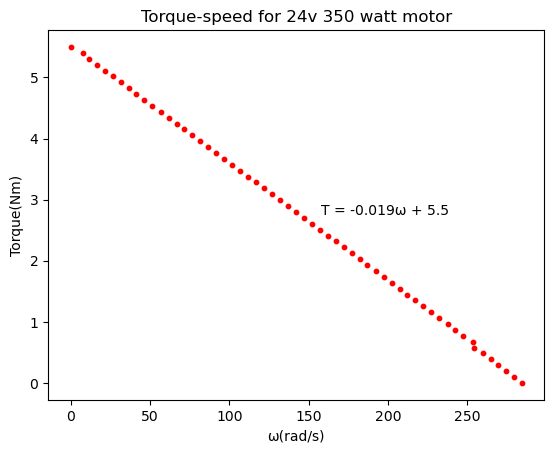

In [10]:
import numpy as np

# Creating a scatter plot of the data
ax = df.plot(kind="scatter", x="ω(rad/s)", y="Torque(Nm)" , s=10, c="red", title="Torque-speed for 24v 350 watt motor")

# Calculating the slope and y-intercept of the linear regression line
slope, intercept = np.polyfit(df["ω(rad/s)"], df["Torque(Nm)"], 1)

# Adding the equation to plot
equation = f'T = {slope:.3f}ω + {intercept:.1f}'

ax.annotate(equation, xy=(0.55, 0.5), xycoords='axes fraction')

plt.show()

#### Points to note:

<font size = '3'>

* The stall torque is 5.5 N.M . However, In practise the maximum torque is limited by the electronic controller . Otherwise the currents would be extremely high, and would damage the motor.<br><br>
* Based on the specification of a 24v 350 watt motor . The half of no-load speed could be taken as critical speed.Therefore, approximately 2.75 N-M is the maximum torque of the motor. It is very important to note down this paramater.<br><br>
* The performance simulations are carried out at maximum torque.<br><br>Until the motor speed reaches a critical value ωc, the maximum torque remains constant. After this point, the torque decreases. In PMDC motors, the torque decreases in a linear manner as the speed increases.</font>


# Mathematical Modelling





### Forces acting on vehicle

<font size = '3'>The vehicle is being subjected to following forces :

* <strong>Rolling Resistance </strong>  at ground-wheel contact.<br><br>Frr = (µrr)mg<br><br>(µrr is the coefficient of rolling resistance)<br><br>

* <strong>Aerodynamic drag </strong> due to air.<br><br>Fad = 1/2ρ x A x Cd x v^(2)( for air ρ = 1.25 kg.m^(−3) )<br><br>

* <strong>Slope climbing Force</strong> required to drive vehicle up a slope.<br><br>Fsc = mg x sin(θ)<br><br>

* <strong>Linear acceleration force</strong> required to accelerate vehicle linearly.<br><br>Fla = ma<br><br>

* <strong>Rotational acceleration</strong> of moving parts in the vehicle.<br><br>Fωa = I x G^(2)(a)/(ηg)r^(2)<br><br>('G' is the gear ratio , 'I' is the moment of inertia of the rotor of the motor.)<br><br>


The<strong> Total tractive effort</strong> is the sum of all these forces:

<br><strong>Fte = Frr + Fad + Fsc + Fla + Fωa</strong> ---------- [1]

<br>can be rewritten as,

<br>Fte = (µrr)mg + 0.625A(Cd) x ν^(2) + ma + I x G^(2)(a)/(ηg)r^(2)

<br>G(T)/r = (µrr)mg + 0.625A(Cd) x ν^(2) + (m + I x G^(2)/(ηg)r^(2)) x dν/dt</font>

<br>
<br>

#### Retrofit specifications

<font size = '3'>Mass of retrofit = 17 kg
<br>Mass of generic wheelchair = 18 kg
<br>Mass of typical user = 75 kg
<br><br>
Total mass = 110 kg 
<br><strong>Total effective mass</strong> = 110 kg + (5% of 110kg) = <strong>115.5 kg</strong>
<br><br>
<strong>Cd</strong>(Drag Cofficent) = <strong>0.9</strong>
<br><strong>Frontal area</strong> = <strong>0.7</strong> (using 3-dimensional model developed in SOLIDWORKS®)
<br><br>
<strong>Wheel bearing cofficent</strong>(µrr rolling resistance) = <strong>0.01</strong>
<br><br>
<strong>Tire radius(m)</strong> = <strong>0.1875</strong>

<strong>First gear ratio</strong> = <strong>15</strong>

---

#### Total tractive effort equation

When torque is constant (i.e T = 2.75 N.M) the equation-[1] becomes
<br>
<br>
(15/0.1875) x 0.88 x 2.75 = 0.01 x (115.5) x 9.8 + 0.625 x 0.7 x 1.2 x v^(2) + 115.5(dv/dt)

193.6 = 11.32 + 0.393 x v^(2) + 115.5 x (dv/dt)

115.5(dv/dt) = 182.28 - 0.393 x v^(2)
<br>
<br>
(dv/dt) = 1.578 - 0.0034 x v^(2)
<br>
<br>
It can be rewritten as,
<br>
<br>
(vn+1) - vn = dt × (1.578 - 0.0034 x v^(2)n)
<br>
<br>
<strong>vn+1 = vn + dt × (1.578 - 0.0034 x v^(2)v^(2)n)</strong>---------- [2]
<br>
<br>
<br>
The equation [6] holds true till the critical point (i.e 142 (rad/s)).<br>
<br> which corresponds to (142/15) x 0.1875 = 1.775 m/s 
<br>
<br>
After this point the torque will be goverened by following equation. 
<br>
<br>
Torque = (5.5 – 0.019ω) 
<br>
<br>
Therefore , Torque will reduce linearly with increase in angular speed and the equation [1] can be rewritten as,
<br>
<br>
<br>
G(5.5 – 0.019ω )/r =   µrrmg +    0.625ACdV^2   +  (m + ( IG^2/nr^2) x dV/dt

G(5.5 – 0.019Gv/R )/ r =   µrrmg +    0.625ACdV^2   +  (m + ( IG^2/nr^2) x dV/dt

(15/0.1875) x 0.88 x (5.5 – 0.019(15)v/(0.1875)) = 0.01 x (115.5) x 9.8 + 0.625 x 0.7 x 0.9 x v^(2) + 115.5(dv/dt)

387.2 - 107.08v = 11.32 + 0.393 x v^(2) + 115.5 x (dv/dt)

115.5 x (dv/dt) = 375.88 - 107.08v - 0.393 x v^(2)
<br>
<br>
(dv/dt) = 3.254 - 0.927v - 0.0034 x v^(2)
<br>
<br>
It can be rewritten as,
<br>
<br>
vn+1 - vn = dt × (3.254 - 0.927v - 0.0034 x v^(2)n)
<br>
<br>
<strong>vn+1 = vn + dt × (3.254 - 0.927v - 0.0034 x v^(2)n)</strong>---------- [3]
<br>
<br>
<br>
There are many practical ways of solving the differential equations [2] and [3] . We can use <strong>Python Programming Language</strong> for this purpose. </font>



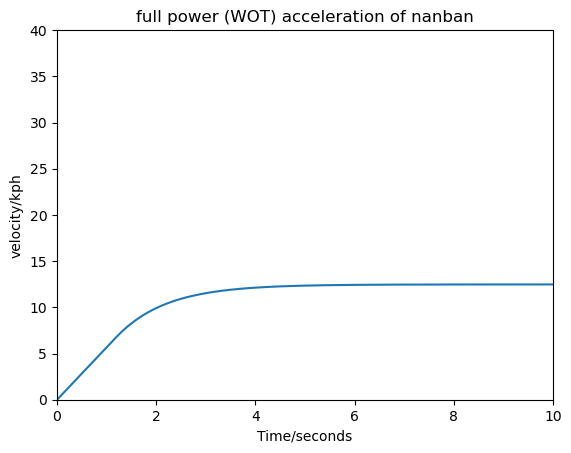

In [29]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 50, 501)
vel = np.zeros(501)
d = np.zeros(501)
dT = 0.1

for n in range(500):
    if vel[n] < 1.775:
        vel[n+1] = vel[n] + dT*(1.578 - (0.0034*(vel[n]**2))) # Using Equation[2] , The torque is constant.
    else:
        vel[n+1] = vel[n] + dT*(3.254 - (0.927*vel[n]) - (0.0034*(vel[n]**2))) # Using Equation[3]

vel = vel * 3.6
plt.plot(t, vel)
plt.axis([0, 10, 0, 40])
plt.xlabel('Time/seconds')
plt.ylabel('velocity/kph')
plt.title('full power (WOT) acceleration of nanban')
plt.show()

#### Points to note

<font size= '3'>The above graph gives some interesting insights:

With 15:1 gear ratio (ie , G = 15):

* The graph depicts that the maximum speed achievable is slightly above 10 kmph. Once the vehicle reaches this velocity, it cannot accelerate any further as all the forces acting on it balance out. Consequently, the graph displays a straight line after the vehicle attains its maximum speed.

Let's find out the exact value for - Top speed , Time Taken to achieve top speed and Acceleration.</font>

In [30]:
for x in range(100):
    if round(vel[x],2) >= round(vel[x+1],2):
        print('Top speed - ', round(vel[x],2),'kmph' , 'or' ,round((vel[x]/3.6),2) , 'm/s' )
        print('Time taken - ', round(x*(0.1),2) ,'sec')
        print('Acceleration - ', "%.2f" %  ((round(vel[x],2)/3.6)/(x*(0.1) )) , 'm/s^(2)')
        break
    else:
        continue

Top speed -  12.41 kmph or 3.45 m/s
Time taken -  5.6 sec
Acceleration -  0.62 m/s^(2)


## Two-speed gearbox (WOT) curve :

<br>
<br>
<font size= '3'>The first gear provides high magnitude of torque at lower velocity. whereas when the speed is gradually increased, shifting to the second gear helps the vehicle to perform better at higher velocities.

So , after defining the equation of second gear . The (WOT) curve of a vehicle equipped with two-speed gearbox will be plotted.


<strong>Second gear ratio  = 7 </strong>

---


When torque is constant (i.e T = 2.75 N.M) the equation-[1] becomes
<br>
<br>
(7/0.1875) x 0.88 x 2.75 = 0.01 x (115.5) x 9.8 + 0.625 x 0.7 x 0.9 x v^(2) + 115.5(dv/dt)

90.35 = 11.32 + 0.393 x v^(2) + 115.5 x (dv/dt)

115.5(dv/dt) = 79.02 - 0.393 x v^(2)
<br>
<br>
(dv/dt) = 0.684 - 0.0034 x v^(2)
<br>
<br>
It can be rewritten as,
<br>
<br>
(vn+1) - vn = dt × (0.684 - 0.0034 x v^(2)n)
<br>
<br>
<strong>vn+1 = vn + dt × (0.684 - 0.0034 x v^(2)n)</strong>---------- [4]
<br>
<br>
<br>
The equation [4] holds true till the critical point (i.e (142 rad/s)).<br>
<br> which corresponds to (142/7) x (0.1875) = 3.8 m/s.
<br>
<br>
After this point the torque will be goverened by following equation. 
<br>
<br>
Torque = (5.5 – 0.019ω) 
<br>
<br>
Therefore , Torque will reduce linearly with increase in angular speed and the equation [1] can be rewritten as,
<br>
<br>
<br>
G(5.5 – 0.019ω )/r =   µrrmg +    0.625ACdV^2   +  (m + ( IG^2/nr^2) x dV/dt

G(5.5 – 0.019Gv/R )/ r =   µrrmg +    0.625ACdV^2   +  (m + ( IG^2/nr^2) x dV/dt

(7/0.1875) x 0.88 x (5.5 – 0.019(7)v/(0.1875)) = 0.01 x (115.5) x 9.8 + 0.625 x 0.7 x 0.9 x v^(2) + 115.5(dv/dt)

180.7 - 23.3v = 11.32 + 0.393 x v^(2) + 115.5 x (dv/dt)

115.5 x (dv/dt) = 169.37 - 23.3v - 0.393 x v^(2)
<br>
<br>
(dv/dt) = 1.56 - 0.201v - 0.0034 x v^(2)
<br>
<br>
It can be rewritten as,
<br>
<br>
vn+1 - v = dt × (1.56 - 0.201v - 0.0034 x v^(2)n)
<br>
<br>
<strong>vn+1 = v + dt × (1.56 - 0.201v - 0.0034 x v^(2)n)</strong>---------- [7]
<br>
<br>
<br>

Let's plot the graph of vehicle equipped with a two speed gearbox.</font>

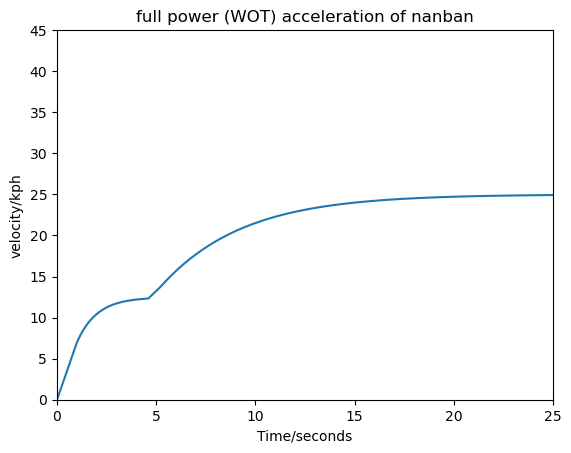

In [37]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 50, 501)
vel = np.zeros(501)
d = np.zeros(501)
dT = 0.1

for n in range(500):
    if vel[n] < 1.775:
        vel[n+1] = vel[n] + dT*(1.938 - (0.0034*(vel[n]**2))) # Using Equation[2] , The torque is constant.
    elif vel[n] < 3.42:
        vel[n+1] = vel[n] + dT*(3.25 - (0.926*vel[n]) - (0.0034*(vel[n]**2))) # Using Equation[3]

    # Vehicle is shifted to second gear
    
    elif vel[n] < 3.8:
        vel[n+1] = vel[n] + dT*(0.684 - (0.0034*(vel[n]**2))) # Using Equation[4]  , The torque is constant.
    else:
        vel[n+1] = vel[n] + dT*(1.56 - (0.201*vel[n]) - (0.0034*(vel[n]**2))) # Using Equation[5]
    d[n+1] = d[n] + 0.1*vel[n]

vel = vel * 3.6
plt.plot(t, vel)
plt.axis([0, 25, 0, 45])
plt.xlabel('Time/seconds')
plt.ylabel('velocity/kph')
plt.title('full power (WOT) acceleration of nanban')
plt.show()

#### Points to note

<font size= '3'>

* A gradual increase in the speed of vehicle is visible after gear shifting.

* The slope of first gear is steeper in the comparison of second gear . This indicates the higher acceleration in first gear.

* The top speed is appearing to be little less than 25 kmph.

Let's find out the exact value for - Top speed , Time Taken to achieve top speed and Acceleration.

</font>

In [46]:
for x in range(300):
    if round(vel[x],2) >= round(vel[x+1],2):
        print('Maximum speed - ', round(vel[x],2),'kmph')
        print('Time taken - ', round(x*(0.1),2) ,'sec')
        break
    else:
        continue

Maximum speed -  24.64 kmph
Time taken -  19.0 sec


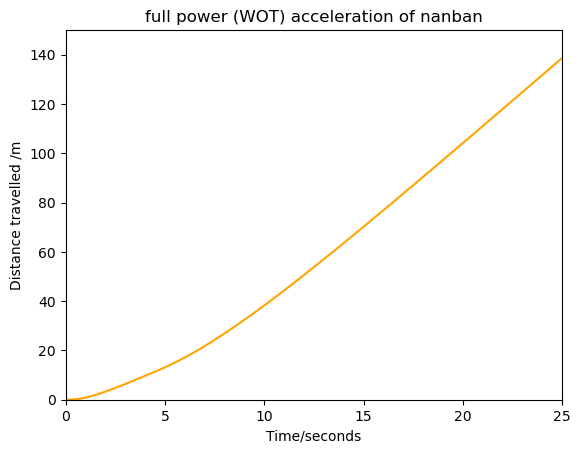


Distance covered till (t = 25.0 sec)  -   138.61 meters
Average velocity till (t = 25.0 sec)  -   19.96 kmph


In [45]:
plt.plot(t,d , color='orange')
plt.axis([0,25,0,150])
plt.xlabel('Time/seconds')
plt.ylabel('Distance travelled /m')
plt.title('full power (WOT) acceleration of nanban')
plt.show()
print('\nDistance covered till (t =', t[250], 'sec)  -  ' , round(d[250] , 2) , 'meters')
print('Average velocity till (t =', t[250], 'sec)  -  ' ,"%.2f" % ((round(d[250] , 2)/t[250])*3.6) , 'kmph')


<font size = '3'>

#### Points to note

In the  distance vs time graph plotted above,
<br>
<br>
The line plot shown above ,  is curved till t = 10 sec . After this , the line plot becomes linear . This indicates that vehicle has attained the maximum speed in this region. vehicle cannot accelerate any further as all the forces acting on it balance out.


### Finalizing gear ratio

While designing a two speed gearbox , we had to decide on the gear ratio value for first gear and second gear.

We ran multiple iterations using using the code shared above.

Following values were finalized,

First gear ratio  = 15

Second gear ratio  = 7</font>

# Full-scale working model

<font size = '3'>
<br>

## Two-Speed Gearbox

The two speed gearbox is designed with -

Gearbox ratio (G1) = 3
<br> Gearbox ratio (G2) = 1.4

The Fixed gear ratio (between gearbox output and wheel sprocket) = 5


Therefore,
<br>
<br> <strong>First gear ratio = 3 x 5 = 15</strong>
<br> <strong>Second gear ratio = 1.4 x 5 = 7</strong></font>



<img src = gearbos.png width = 700>
<img src = geard.gif width = 700>
<br>
<br>
<font size = '3'>
<strong>Fig - 1 :</strong> Two-Dimensional schematic diagram and Dynamic animation of Two-speed gearbox .<br> Dog-clutch seamlessly shifts between first and second gears.
<br>
<br>
<img src = gear2.jpg width = 700>
<br>
<br>
<strong>Fig - 2 :</strong> Manufactured full-scale Two-speed gearbox.
<br>
<br>
<img src = gear4.jpg width = 700>
<br>
<br>
<strong>Fig - 3 :</strong> Gearbox casing
<br>
<br>
<img src = gear5.jpg width = 700>
<br>
<br>
<strong>Fig - 4 :</strong> Freewheel machined within the gear hub.</font>
<br>
<br>

## Retrofit Frame

<font size = '3'>
The Retrofit frame houses two-speed gearbox and electric components.The Frame is designed to quickly latch on and off the wheelchair.
<br>
<br>
<br>
<img src = nanban11.png width = 700>
<img src = wheel.gif width = 700>
<br>
<br>
<strong>Fig - 5 :</strong> Two-Dimensional schematic diagram and Dynamic animation of Retrofit . The retrofit quickly latches on and off the wheelchair.
<br>
<br>
<img src = nanban2.jpg width = 700>
<img src = nanban5.jpg width = 700>
<br>
<br>
<strong>Fig - 6 :</strong> Topview and Side view of retrofit (during manufacturing phase).
<br>
<br>
<img src = real.png width = 1000>
<br>
<br>
<strong>Fig - 7 :</strong> Side view and Front view of Fully-functional (1:1) Model.</font>
<br>
<br>

## Dynamic Testing of Retrofit


<iframe width="600" height="350" src="https://www.youtube.com/embed/7dkvL-Sbo-8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

### Two-speed Gearbox working

<iframe width="600" height="350" src="https://www.youtube.com/embed/zvilWFb2wDM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Conclusion


<font size = '3'>
Following observations were made after the performance test of full scale model :
<br>
<br>

* Maximum speed  <strong>23.2 kmph , 14.4 mph;</strong><br>
* Distance covered in first <strong>25 sec , 129.5 meters</strong><br>
* 100 m from standing start time,<strong> 19.1 sec</strong>
<br>
<br>
<br>
We used mathematical modelling to measure these values during designing phase.
The measured values during designing phase were:
<br>
<br>

* Max speed     *24.64 kmph*<br>
* Distance covered till (t = 25.0 sec)      *138.61 meters*<br><br>
<img src = 'vtdt.png' width = 800 >
<br><br>
Interestingly , The observations of full-scale model are remarkably similar to our mathematically calculated values during designing phase.
</font>